In [1]:
import pandas as pd
import os

In [2]:
# Calculate the average of the values in the 'Status' column from given xlsx file
def calculate_average_status(filename):
    data = pd.read_excel(filename)
    return data['Status'].mean()

def main():
    # Loop through all files in specified directory
    # Access to log/session directory
    directory = "log/session"
    for filename in os.listdir(directory):
        if filename.endswith('.xlsx'):
            print(f'Average of {filename}: {calculate_average_status(os.path.join(directory, filename))}')


In [3]:
main()

Average of click-menu-2_evaluation.xlsx: 0.6
Average of click-pie_evaluation.xlsx: 0.0
Average of click-scroll-list_evaluation.xlsx: 1.0
Average of click-test-2_evaluation.xlsx: 1.0
Average of click-widget_evaluation.xlsx: 0.5
Average of enter-password_evaluation.xlsx: 1.0
Average of enter-text-2_evaluation.xlsx: 1.0
Average of enter-text-dynamic_evaluation.xlsx: 1.0
Average of enter-text_evaluation.xlsx: 0.9
Average of flight.AA_evaluation.xlsx: 0.0
Average of focus-text-2_evaluation.xlsx: 1.0
Average of focus-text_evaluation.xlsx: 1.0
Average of grid-coordinate_evaluation.xlsx: 1.0
Average of multi-layouts_evaluation.xlsx: 1.0
Average of multi-orderings_evaluation.xlsx: 1.0
Average of navigate-tree_evaluation.xlsx: 1.0
Average of read-table_evaluation.xlsx: 0.1


In [8]:
import openpyxl
import json
import os
import pandas as pd

In [19]:
wb = openpyxl.Workbook()
ws = wb.active
ws.append(['task', 'content-extractor-prompt-tokens', 'content-extractor-completion-tokens', 'agent-prompt-tokens', 'agent-completion-tokens', 'input-gen-prompt-tokens', 'input-gen-completion-tokens', 'terminator-prompt-tokens', 'terminator-completion-tokens', 'rule-prompt-tokens', 'rule-completion-tokens'])

def main():
    # Loop through all files in specified directory
    # Access to log/session directory
    directory = "log/session"
    for filename in os.listdir(directory):
        if filename.endswith('evaluation.xlsx'):
            data = pd.read_excel(os.path.join(directory, filename))
            token_str = data['Token usage'].values[0]
            token_str = token_str.replace("\'", "\"")
            token = json.loads(token_str)
            # Get task name from filename, which is before _evaluation.xlsx
            task = filename.split('_evaluation.xlsx')[0]
            # Append the data to the worksheet, if the data is empty, append 0
            content_extractor_prompt_tokens = token['content_extractor']['prompt_tokens'] if 'content_extractor' in token else 0
            content_extractor_completion_tokens = token['content_extractor']['completion_tokens'] if 'content_extractor' in token else 0
            agent_prompt_tokens = token['agent']['prompt_tokens'] if 'agent' in token else 0
            agent_completion_tokens = token['agent']['completion_tokens'] if 'agent' in token else 0
            input_generator_prompt_tokens = token['input_generator']['prompt_tokens'] if 'input_generator' in token else 0
            input_generator_completion_tokens = token['input_generator']['completion_tokens'] if 'input_generator' in token else 0
            terminator_prompt_tokens = token['terminator']['prompt_tokens'] if 'terminator' in token else 0
            terminator_completion_tokens = token['terminator']['completion_tokens'] if 'terminator' in token else 0
            rule_prompt_tokens = token['rule_extractor']['prompt_tokens'] if 'rule_extractor' in token else 0
            rule_completion_tokens = token['rule_extractor']['completion_tokens'] if 'rule_extractor' in token else 0

            ws.append([task, content_extractor_prompt_tokens, content_extractor_completion_tokens, agent_prompt_tokens, agent_completion_tokens, input_generator_prompt_tokens, input_generator_completion_tokens, terminator_prompt_tokens, terminator_completion_tokens, rule_prompt_tokens, rule_completion_tokens])
    
    wb.save('token_usage.xlsx')
            
main()

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [7]:
token = pd.read_excel('token_usage.xlsx')
# Print length of each column
print(token.count())

task                                   77
content-extractor-prompt-tokens        77
content_prompt                         77
content-extractor-completion-tokens    77
content_completion                     77
agent-prompt-tokens                    77
agent_prompt                           77
agent-completion-tokens                77
agent_completion                       77
input-gen-prompt-tokens                77
input_prompt                           77
input-gen-completion-tokens            77
input_completion                       77
terminator-prompt-tokens               77
terminator_prompt                      77
terminator-completion-tokens           77
terminator_completion                  77
rule-prompt-tokens                     77
rule_prompt                            77
rule-completion-tokens                 77
rule_completion                        77
dtype: int64


In [12]:
len(token['input_completion'].values)

77

In [9]:
token = pd.read_excel('token_usage copy.xlsx')

# Print the values of first column, access by column index
print(token.iloc[:, 0].values)

['amazon_1' 'amazon_2' 'amazon_3' 'amazon_4' 'amazon_5'
 'book-flight-nodelay' 'choose-date' 'click-button'
 'click-checkboxes-large' 'click-checkboxes-soft' 'click-checkboxes'
 'click-collapsible-2' 'click-collapsible' 'click-dialog-2' 'click-dialog'
 'click-link' 'click-menu-2' 'click-option' 'click-scroll-list'
 'click-tab-2-hard' 'click-tab-2' 'click-tab' 'click-test-2' 'click-test'
 'click-widget' 'email-inbox-forward-nl' 'enter-password' 'enter-text-2'
 'enter-text-dynamic' 'enter-text' 'expedia_1' 'expedia_2' 'expedia_3'
 'expedia_4' 'expedia_5' 'facebook_1' 'facebook_2' 'facebook_3'
 'facebook_4' 'facebook_5' 'facebook_6' 'flight.AA' 'flight.Alaska-auto'
 'flight.Alaska' 'focus-text-2' 'focus-text' 'google_1' 'google_2'
 'google_3' 'google_4' 'google_5' 'google_6' 'grid-coordinate'
 'linkedin_1' 'linkedin_2' 'linkedin_3' 'linkedin_4' 'linkedin_5'
 'login-user' 'multi-layouts' 'multi-orderings' 'navigate-tree'
 'read-table' 'search-engine' 'social-media-all' 'social-media-some'


In [12]:
token = pd.read_excel('token_usage copy.xlsx')
# set seed for random numpy
np.random.seed(1)
# Create a sample dataset
data = {
    'Category': ['content-prompt-tokens'] * 76 + 
                ['agent-prompt-tokens'] * 76 + 
                # ['input-prompt-tokens'] * 76 + 
                # ['terminator-prompt-tokens'] * 76 + 
                ['rule-prompt-tokens'] * 76 + 
                ['content-completion-tokens'] * 76 + 
                ['agent-completion-tokens'] * 76 + 
                # ['input-completion-tokens'] * 76 + 
                # ['terminator-completion-tokens'] * 76 + 
                ['rule-completion-tokens'] * 76,
    'Tokens': list(token.iloc[:, 1].values*50) +    # Example token data for category 1
            list(token.iloc[:, 3].values*50 + token.iloc[:, 7].values*50) + 
            # list(token.iloc[:, 5].values*50) + 
            # list(token.iloc[:, 7].values*50) + 
            list(token.iloc[:, 9].values*np.random.normal(12.5, 5, 76)) + 
            list(token.iloc[:, 2].values*50) + 
            list(token.iloc[:, 4].values*50 + token.iloc[:, 8].values*50) + 
            # list(token.iloc[:, 6].values*50) + 
            # list(token.iloc[:, 8].values*50) + 
            list(token.iloc[:, 10].values*np.random.normal(12.5, 5, 76))
}
print(len(data['Tokens']))
print(len(data['Category']))

df = pd.DataFrame(data)
modified_data = df.replace(0, np.nan)
modified_data['Category'] = modified_data['Category'].str.replace('-tokens', '')


456
456


In [6]:
token = pd.read_excel('token_usage copy.xlsx')
# set seed for random numpy
np.random.seed(1)
# Create a sample dataset
data = {
    'Category': ['input-prompt-tokens'] * 76 + 
                ['input-completion-tokens'] * 76,
    'Tokens': list(token.iloc[:, 5].values*50) +
             list(token.iloc[:, 6].values*50)
}
print(len(data['Tokens']))
print(len(data['Category']))

df = pd.DataFrame(data)
modified_data = df.replace(0, np.nan)

# Remove the text -tokens from the category
modified_data['Category'] = modified_data['Category'].str.replace('-tokens', '')



152
152


In [13]:
modified_data

,Category,Tokens
0,content-prompt,145950.0
1,content-prompt,138600.0
2,content-prompt,234700.0
3,content-prompt,149300.0
4,content-prompt,312300.0
...,...,...
451,rule-completion,NaN
452,rule-completion,NaN
453,rule-completion,NaN
454,rule-completion,NaN


C:\Users\ASUS\AppData\Local\Temp\ipykernel_35924\1546390634.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


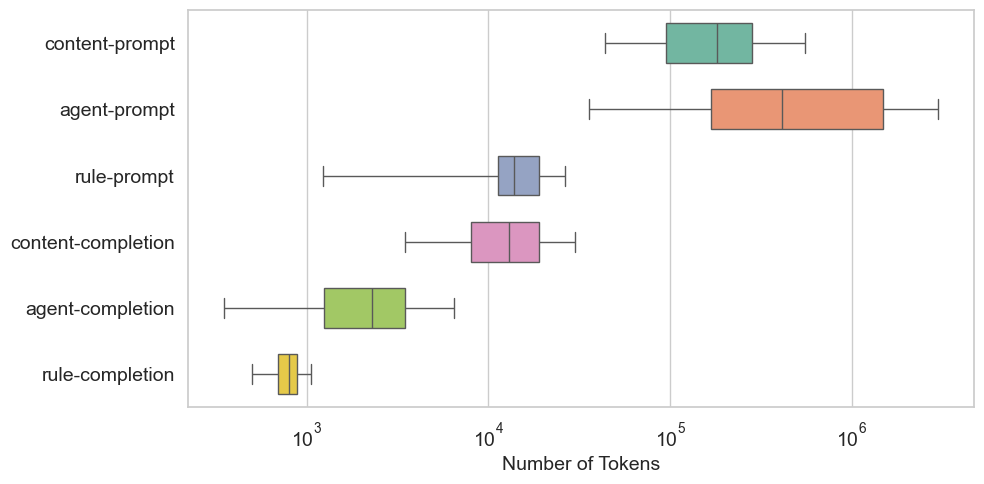

In [15]:
# Set Seaborn style for better visuals
sns.set(style="whitegrid")

# Initialize the figure
plt.figure(figsize=(10, 5))

# Create the boxplot
sns.boxplot(
    data=modified_data,
    y="Category",
    x="Tokens",
    palette="Set2",
    width=0.6,
    showfliers=False
)

# Increase the font size of y ticks label
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

# Set the x-axis scale to logarithmic
plt.xscale("log")

# Add axis labels and title
plt.xlabel("Number of Tokens", fontsize=14)
plt.ylabel("")
# plt.title("Number of Tokens for Model Input/Output", fontsize=14)

# Adjust layout and display the plot
# plt.tight_layout()
# plt.show()

plt.tight_layout()
plt.savefig("token_usage.pdf", bbox_inches='tight')

In [1]:
import pandas as pd

# Load the two sheets
sheet1 = pd.read_excel('task_stat.xlsx')
sheet2 = pd.read_excel('token_usage copy.xlsx')

# Merge sheets on the 'task' column
merged_sheet = pd.merge(sheet1, sheet2, on='task', how='inner')  # Use 'inner', 'outer', 'left', or 'right' as needed

# Save the result to a new file or view it
merged_sheet.to_excel('token_with_stat_fix.xlsx', index=False)
print(merged_sheet)

                      task  screen  action_seq  actions_screen  total_actions  \
0             click-button       1           1               1            NaN   
1         click-checkboxes       1           4               5            NaN   
2   click-checkboxes-large       1           9              11            NaN   
3    click-checkboxes-soft       1           5               6            NaN   
4        click-collapsible       1           2               2            NaN   
..                     ...     ...         ...             ...            ...   
69               expedia_1       6          13             145            NaN   
70               expedia_2       2           7              97            NaN   
71               expedia_3       6          11              97            NaN   
72               expedia_4       2           2             155            NaN   
73               expedia_5       4           9             145            NaN   

    content-extractor-promp

In [1]:
import pandas as pd

# Load the two sheets
merged_sheet = pd.read_excel('token_with_stat_fix.xlsx')

In [3]:
merged_sheet

,task,screen,action_seq,actions_screen,total_actions_screen_seq,total_actions,content-extractor-prompt-tokens,content-extractor-completion-tokens,agent-prompt-tokens,agent-completion-tokens,input-gen-prompt-tokens,input-gen-completion-tokens,terminator-prompt-tokens,terminator-completion-tokens,rule-prompt-tokens,rule-completion-tokens,total_tokens
0,click-button,1,1,1,1,1,877.000000,95.000000,806.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0,0,1787.000000
1,click-checkboxes,1,4,5,20,20,4412.000000,452.000000,5435.000000,30.000000,0.000000,0.000000,1813.000000,27.000000,1247,65,13481.000000
2,click-checkboxes-large,1,9,11,99,99,11069.000000,913.000000,13251.000000,67.000000,0.000000,0.000000,6174.000000,63.000000,1247,65,32849.000000
3,click-checkboxes-soft,1,5,6,30,30,5528.000000,423.000000,7835.000000,35.000000,0.000000,0.000000,2358.000000,36.000000,1247,65,17527.000000
4,click-collapsible,1,2,2,4,4,1929.000000,172.000000,2767.000000,18.000000,0.000000,0.000000,480.000000,9.000000,0,0,5375.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,expedia_1,6,13,145,1885,11310,32842.000000,1591.000000,133187.000000,116.000000,11696.000000,54.000000,19866.000000,126.000000,1247,65,200790.000000
70,expedia_2,2,7,97,679,1358,19527.307692,864.769231,82014.153846,71.076923,2791.923077,43.615385,10634.076923,67.846154,1247,65,117326.769231
71,expedia_3,6,11,97,1067,6402,31384.800000,1595.200000,92651.200000,100.000000,5831.200000,43.200000,18165.600000,100.800000,1247,65,151184.000000
72,expedia_4,2,2,155,310,620,2890.000000,199.000000,12846.000000,18.000000,0.000000,0.000000,976.000000,18.000000,0,0,16947.000000


In [2]:
import numpy as np
modified_merged_data = merged_sheet.replace(0, np.nan)

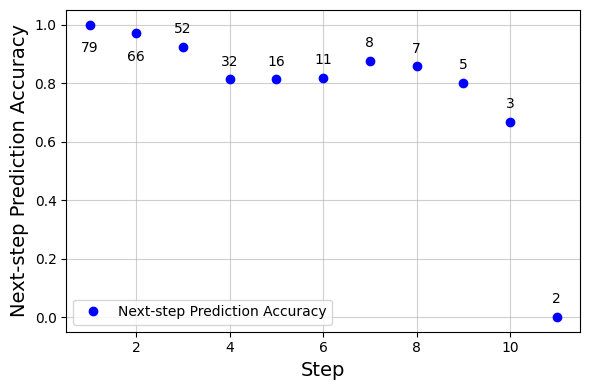

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Read the data from the Excel file
step_accuracy = pd.read_excel('step_accuracy.xlsx')
# Example data
epochs = step_accuracy['step'].values
p_ratio = step_accuracy['accuracy'].values
label = step_accuracy['count'].values

# Plotting the data
plt.figure(figsize=(6, 4))
plt.plot(epochs, p_ratio, 'o', color='blue', markersize=6, label='Next-step Prediction Accuracy')

# Adding labels to each point
for i, txt in enumerate(label):
    if i == 0 or i == 1:
        plt.annotate(txt, (epochs[i], p_ratio[i]), textcoords="offset points", xytext=(0,-20), ha='center')
    else:
        plt.annotate(txt, (epochs[i], p_ratio[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Adding labels and title
plt.xlabel('Step', fontsize=14)
plt.ylabel('Next-step Prediction Accuracy', fontsize=14)
# plt.title('Ratio $pr = p_{noise}/p_{clean}$ for GrB', fontsize=14)

# Grid and legend
plt.grid(True, linestyle='-', alpha=0.6)
plt.legend(loc='lower left')

# Show the plot
plt.tight_layout()
# plt.show()

# Export the plot to a PDF file
plt.savefig('step_accuracy.pdf', bbox_inches='tight')


Lable at index 1:  flight-Alaska-auto
Lable at index 2:  linkedin_3
Lable at index 3:  facebook_5
Lable at index 4:  amazon_3
Lable at index 5:  stackoverflow_3
Lable at index 6:  expedia_2
Lable at index 7:  expedia_3
Lable at index 8:  expedia_5


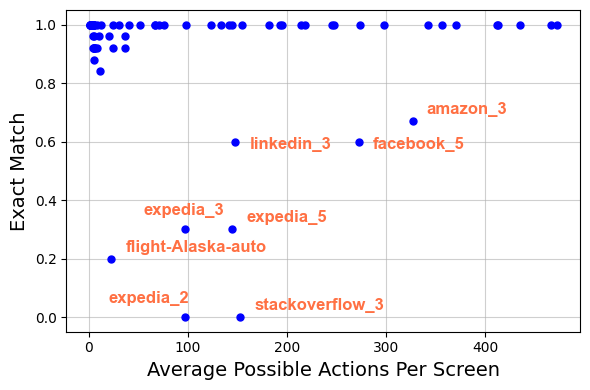

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the data from the Excel file
complexity = pd.read_excel('complexity.xlsx')
# Example data
epochs = complexity['actions_screen'].values
p_ratio = complexity['accuracy'].values
label = complexity['task'].values

# Plotting the data
plt.figure(figsize=(6, 4))
plt.plot(epochs, p_ratio, 'o', color='blue', markersize=5, label='Exact Match')
# plt.scatter(
#     epochs, p_ratio,
#     color='blue',          # Fill color of the dots
#     # edgecolors='orange',    # Border color for the dots
#     # linewidth=0.4,         # Width of the border
#     s=50,                  # Size of the dots
#     label="Exact Match"
# )

# for i, (x, y) in enumerate(zip(epochs, p_ratio)):
#     if y < 0.7:
#         plt.text(x, y, label[i], fontsize=10, color='red', ha='right')

# Annotate points
custom_offset = [
    (10, 5),
    (10, -5),
    (10, -5),
    (10, 5),
    (10, 5),
    (-55, 10),
    (-30, 10),
    (10, 5),
    (10, 20),
]
offset_i = 0
for i, (xi, yi) in enumerate(zip(epochs, p_ratio)):
    if yi < 0.7:
        # # Customize offsets for crowded regions
        # if xi < 150 and yi < 0.3:
        #     offset_x, offset_y = -25, -10  # Move labels left and below
        # elif xi < 150 and yi >= 0.3:
        #     offset_x, offset_y = 10, 5    # Move labels right and above
        # else:
        #     offset_x, offset_y = 15, 0    # Move labels slightly right
        offset_x, offset_y = custom_offset[offset_i]
        offset_i += 1
        print(f"Lable at index {offset_i}: ", label[i])
        
        plt.annotate(
            label[i], 
            (xi, yi), 
            textcoords="offset points",
            xytext=(offset_x, offset_y),
            fontsize=12,
            fontweight='bold',
            fontfamily='Arial',
            color='#FF7043',
            # bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white', alpha=0.8),
            # arrowprops=dict(arrowstyle='->', color='gray', lw=0.5) if xi < 150 else None  # Add arrows for clustered areas
        )


# Adding labels and title
plt.xlabel('Average Possible Actions Per Screen', fontsize=14)
# Set x limits and ticks
# Customize x-ticks
# xticks_positions = [x*10 for x in range(500)]  # Custom positions
# xticks_labels = ['0', '50 Actions', '100 Actions', '200 Actions', '300 Actions', '400 Actions', '500 Actions']  # Custom labels
# plt.xticks(xticks_positions, fontsize=10, rotation=30)

plt.ylabel('Exact Match', fontsize=14)
# plt.title('Ratio $pr = p_{noise}/p_{clean}$ for GrB', fontsize=14)

# Grid and legend
plt.grid(True, linestyle='-', alpha=0.6)
# plt.legend(loc='best')

# Show the plot
plt.tight_layout()
# plt.show()

# Export the plot to a PDF file
plt.savefig('action_screens_accuracy.pdf', bbox_inches='tight')


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13808\4183813753.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=complexity, x="task", y="actions_screen", palette=color_mapping, ax=ax1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13808\4183813753.py:27: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax1.set_ylim(0, 1000)


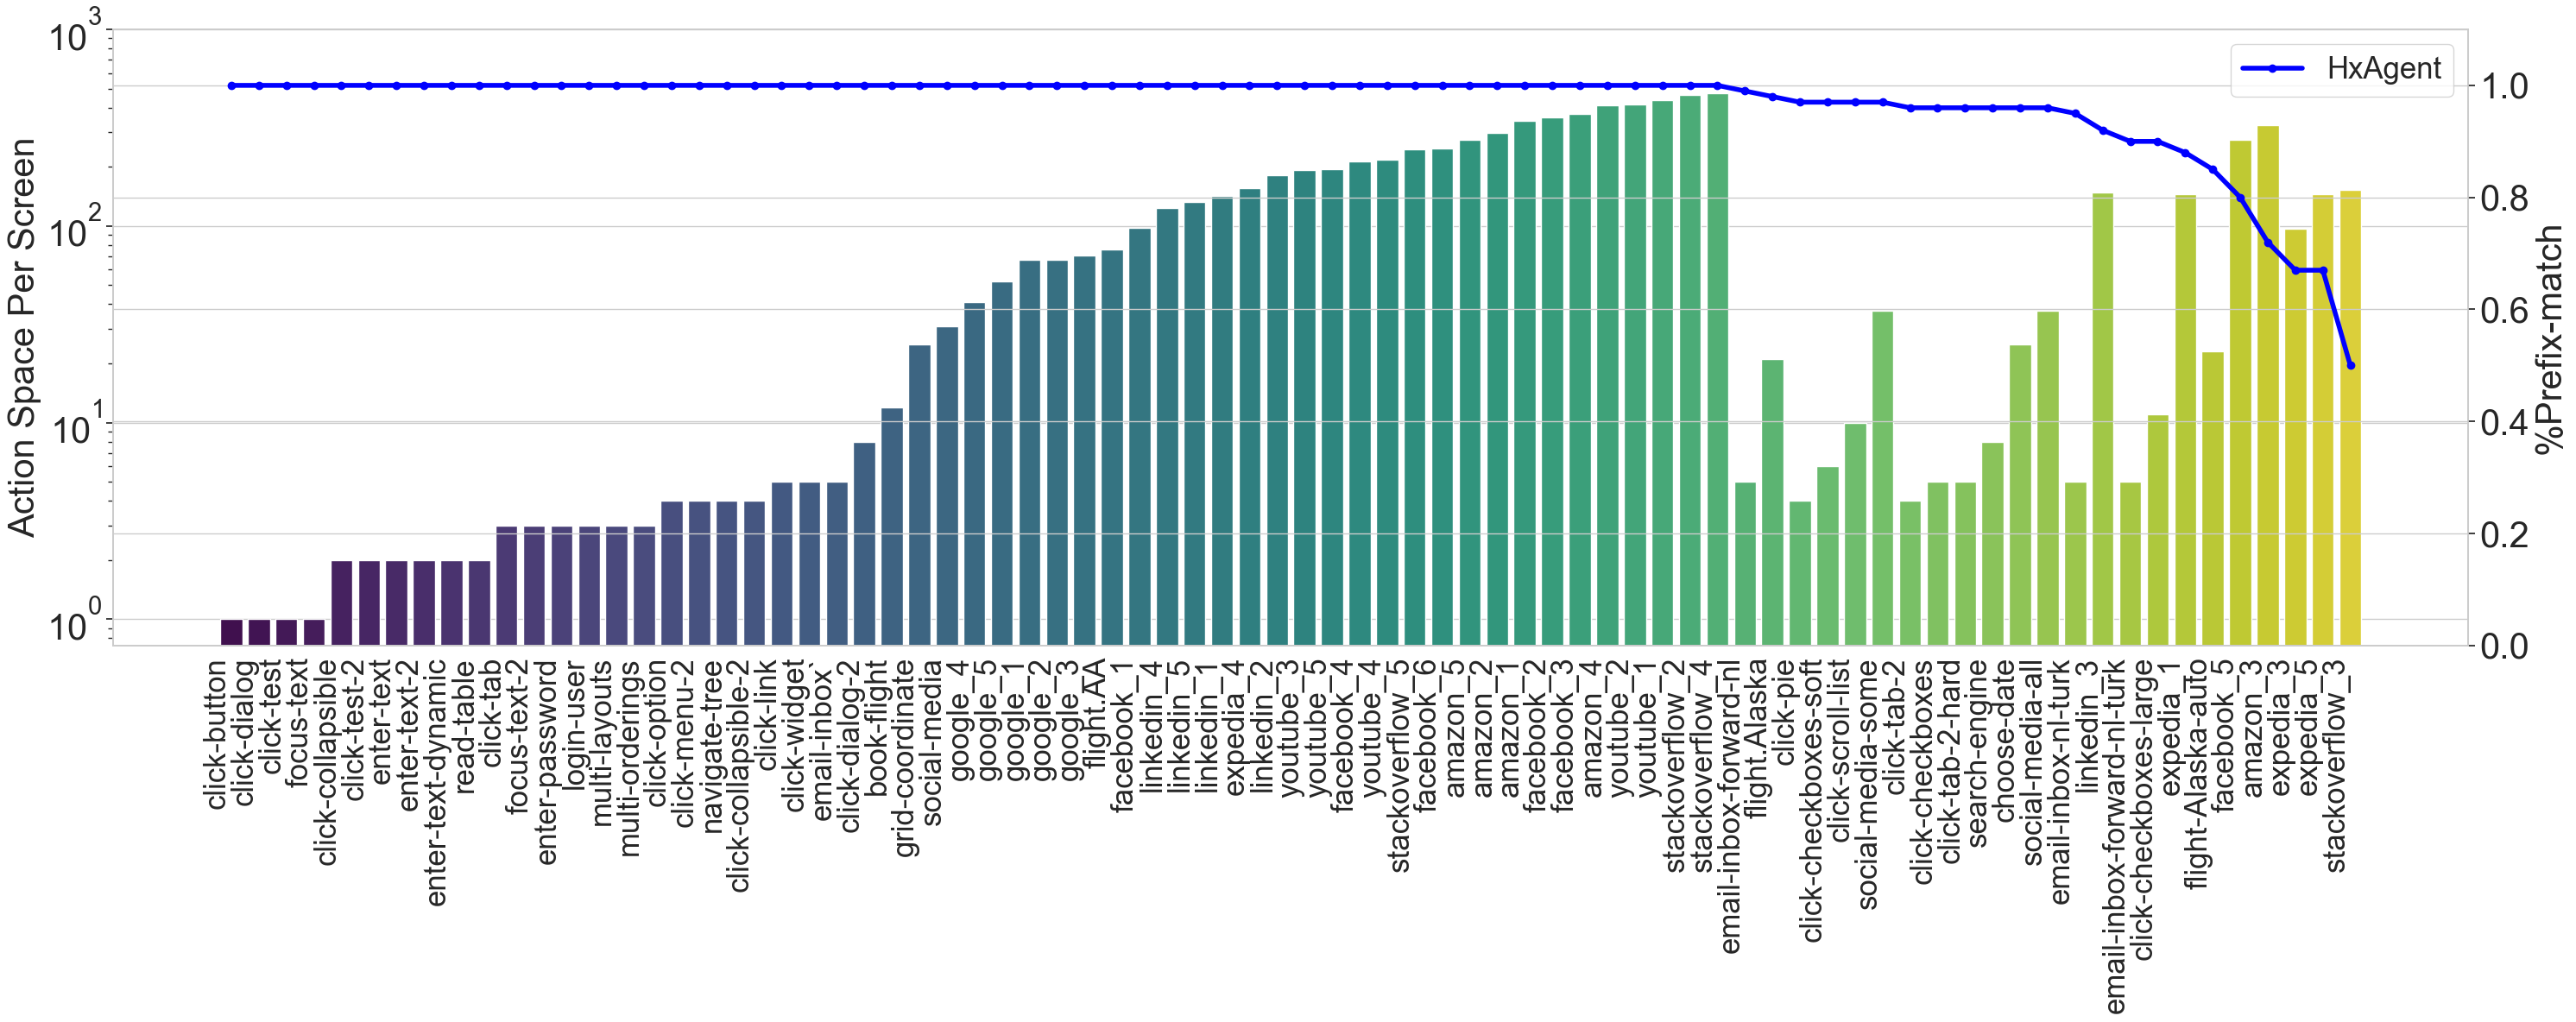

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Function to format y-axis ticks as '1k', '2k', etc.
def thousands_formatter(x, pos):
    if x == 0:
        return '0'
    return f'{int(x / 1000)}k'

# Sort complexity by total_actions
complexity = complexity.sort_values(by=["prefix_accuracy", "actions_screen"], ascending=[False, True])

# Set seaborn style
sns.set(style="whitegrid")
unique_categories = complexity["task"].unique()
palette = sns.color_palette("viridis", len(unique_categories))
color_mapping = dict(zip(unique_categories, palette))

fig, ax1 = plt.subplots(figsize=(30, 12))

# Create the boxplot on the first axis
sns.barplot(data=complexity, x="task", y="actions_screen", palette=color_mapping, ax=ax1)
ax1.set_xlabel("", fontsize=25)
ax1.set_ylabel("Action Space Per Screen", fontsize=30)
ax1.set_yscale('log')
ax1.set_ylim(0, 1000)
# set 6 ticks for y-axis
# ax1.set_yticks([x*(200) for x in range(5)])
# ax1.tick_params(axis='x', labelsize=25, rotation=45, rotation_mode="anchor", ha="right")
ax1.tick_params(axis='y', labelsize=30)
ax1.tick_params(axis='x', labelsize=25)
# ax1.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Create a second axis for the line plot
ax2 = ax1.twinx()
# Plot the accuracy line on the second axis
# Get x-tick positions to match the categories on x-axis
app_positions = range(len(complexity['prefix_accuracy'].values))  # Ensure it's a range for x-coordinates
ax2.plot(app_positions, complexity['prefix_accuracy'].values, color="blue", marker="o", label="HxAgent", linestyle='-', linewidth=4)
ax2.legend(loc="upper right", fontsize=25)
ax2.set_ylabel("%Prefix-match", fontsize=30)
# set y from 0 to 1 with 8 ticks
ax2.set_ylim(0, 1.1)
# ax2.set_yticks([x/4 for x in range(9)])
ax2.tick_params(axis='y', labelsize=30)
ax2.tick_params(axis='x', labelsize=25, labelrotation=45)

# Set the x-ticks for the second axis to match the application names
# ax1.set_xticks(app_positions)
# ax1.set_xticklabels(visidroid_acc_by_app, fontsize=25)

# Display legend for the line plot
ax2.legend(loc="upper right", fontsize=25)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90, ha="right")

# Save and show the plot
plt.tight_layout()
plt.savefig("boxplot_with_prefix_accuracy_line.pdf", bbox_inches="tight")
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13808\1560733103.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=complexity, x="task", y="action_space", palette=color_mapping, ax=ax1)


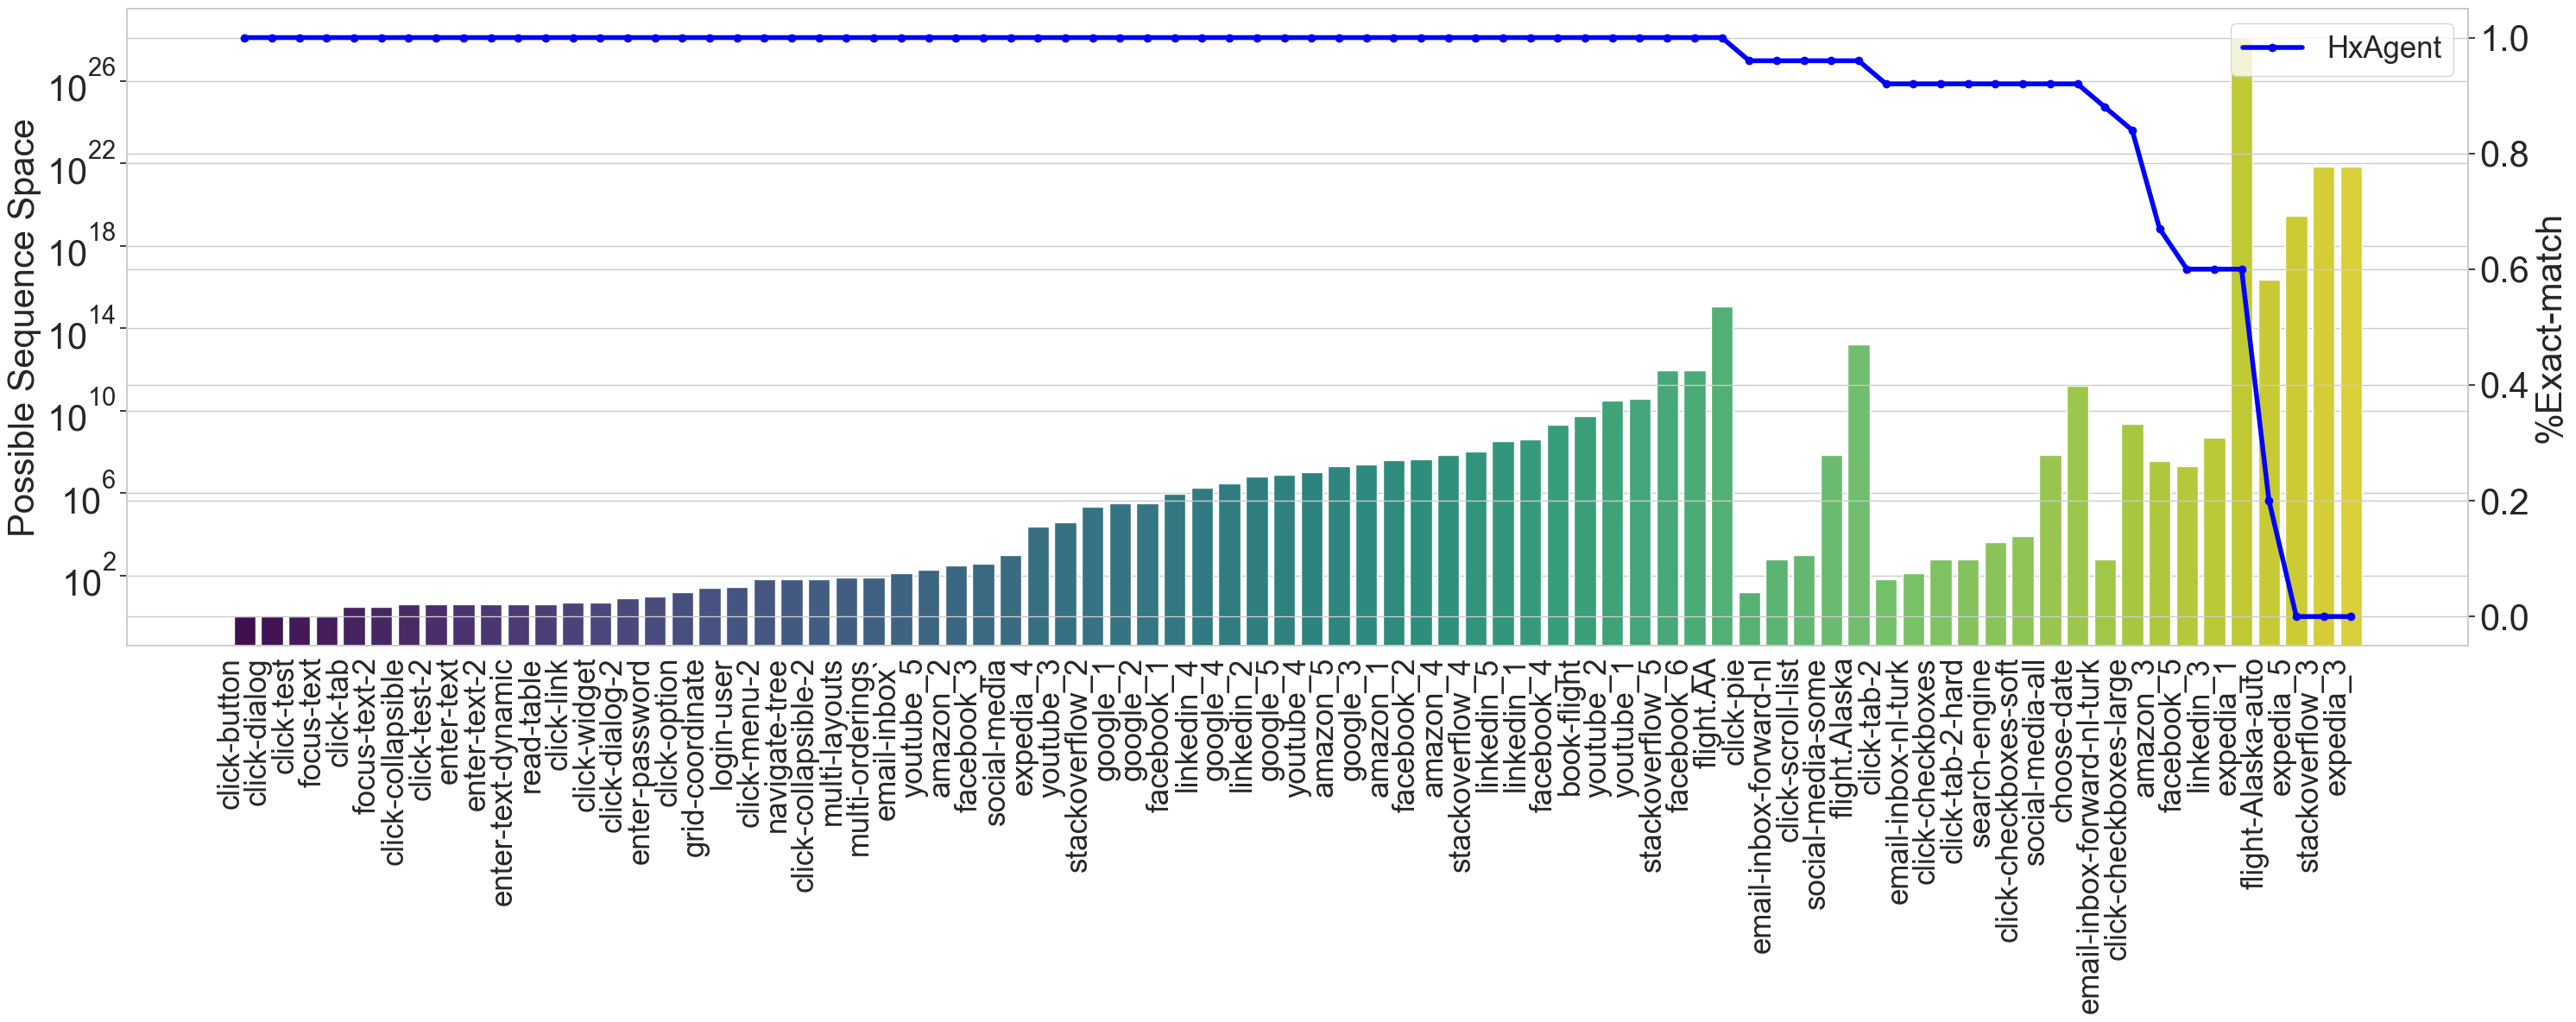

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Function to format y-axis ticks as '1k', '2k', etc.
def thousands_formatter(x, pos):
    if x == 0:
        return '0'
    return f'{int(x / 1000)}k'

complexity = pd.read_excel('complexity.xlsx')

# Sort complexity by total_actions
complexity = complexity.sort_values(by=["accuracy", "action_space"], ascending=[False, True])

# Set seaborn style
sns.set(style="whitegrid")
unique_categories = complexity["task"].unique()
palette = sns.color_palette("viridis", len(unique_categories))
color_mapping = dict(zip(unique_categories, palette))

fig, ax1 = plt.subplots(figsize=(30, 12))

# Create the boxplot on the first axis
sns.barplot(data=complexity, x="task", y="action_space", palette=color_mapping, ax=ax1)
ax1.set_xlabel("", fontsize=25)
ax1.set_ylabel("Possible Sequence Space", fontsize=30)
ax1.set_yscale('log')
# ax1.set_ylim(0, 3000)
# # set 6 ticks for y-axis
# ax1.set_yticks([x*(500) for x in range(6)])
# ax1.tick_params(axis='x', labelsize=25, rotation=45, rotation_mode="anchor", ha="right")
ax1.tick_params(axis='y', labelsize=30)
ax1.tick_params(axis='x', labelsize=25)
# ax1.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Create a second axis for the line plot
ax2 = ax1.twinx()
# Plot the accuracy line on the second axis
# Get x-tick positions to match the categories on x-axis
app_positions = range(len(complexity['accuracy'].values))  # Ensure it's a range for x-coordinates
ax2.plot(app_positions, complexity['accuracy'].values, color="blue", marker="o", label="HxAgent", linestyle='-', linewidth=4)
ax2.legend(loc="upper right", fontsize=25)
ax2.set_ylabel("%Exact-match", fontsize=30)
# set y from 0 to 1 with 8 ticks
# ax2.set_ylim(0, 1.1)
# ax2.set_yticks([x/4 for x in range(9)])
ax2.tick_params(axis='y', labelsize=30)
ax2.tick_params(axis='x', labelsize=25, labelrotation=45)

# Set the x-ticks for the second axis to match the application names
# ax1.set_xticks(app_positions)
# ax1.set_xticklabels(visidroid_acc_by_app, fontsize=25)

# Display legend for the line plot
ax2.legend(loc="upper right", fontsize=25)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90, ha="right")

# Save and show the plot
plt.tight_layout()
plt.savefig("boxplot_with_accuracy_line.pdf", bbox_inches="tight")
plt.show()